<h1> User Engagement Analysis </h2>

<h2> Imporing data and packages </h2>

In [1]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
import warnings
sys.path.insert(1, "../scripts")
warnings.filterwarnings('ignore')

In [2]:
from data_cleaning import DataCleaner
from data_summary import DataSummarizer
from model import DataModel
modeler = DataModel()
cleaner = DataCleaner()
summary = DataSummarizer()

In [3]:
#load the the pkl dumps
col_descript = pd.read_pickle("../data/colum_descript.pkl")
df_cleaned = pd.read_pickle("../data/df_cleaned.pkl")
df_user_aggrigate_outliers_fixed = pd.read_pickle("../data/df_user_aggrigate_outliers_fixed.pkl")
with open('../data/col_types.pickle', 'rb') as handle:
    col_types = pickle.load(handle)
with open('../data/aggrig_col_types.pickle', 'rb') as handle:
    aggrig_col_types = pickle.load(handle)

<h2> Users Exploration

<h3> Top 10 Users per
<li> sessions frequency 
<li> the duration of the session 
<li> the sessions total traffic (download and upload (bytes))


In [41]:
# Showing the top 10 users in each of the following features

selected_features = ['Num_of_Sessions', 'Duration_ms', 'Total_DL', 'Total_UL']
for feature in selected_features:
    print("\n\nTop 10 Users by {}\n".format(feature), df_user_aggrigate_outliers_fixed.sort_values(by=feature, ascending=False).loc[:,feature].head(10))



Top 10 Users by Num_of_Sessions
 MSISDN/Number
3.361871e+10    3.0
3.363219e+10    3.0
3.365251e+10    3.0
3.366372e+10    3.0
3.366372e+10    3.0
3.363217e+10    3.0
3.365039e+10    3.0
3.368560e+10    3.0
3.369841e+10    3.0
3.366245e+10    3.0
Name: Num_of_Sessions, dtype: float64


Top 10 Users by Duration_ms
 MSISDN/Number
3.366263e+10    369.762
3.376394e+10    369.761
3.369828e+10    369.757
3.366320e+10    369.700
3.366882e+10    369.649
3.369841e+10    369.622
3.366539e+10    369.587
3.363233e+10    369.580
3.368651e+10    369.530
3.366051e+10    369.523
Name: Duration_ms, dtype: float64


Top 10 Users by Total_DL
 MSISDN/Number
3.366169e+10    1426.349929
3.368544e+10    1426.111753
3.376731e+10    1426.043367
3.366792e+10    1426.032000
3.366115e+10    1425.993499
3.376389e+10    1425.784319
3.367588e+10    1425.721558
3.376028e+10    1425.711192
3.366898e+10    1425.688614
3.366214e+10    1425.594823
Name: Total_DL, dtype: float64


Top 10 Users by Total_UL
 MSISDN/Number

In [10]:
unnormalized_data = df_user_aggrigate_outliers_fixed[selected_features]
selected_features = ['Num_of_Sessions', 'Duration_ms', 'Total']
unnormalized_data['Total'] = unnormalized_data['Total_DL'] + unnormalized_data['Total_UL']
unnormalized_data = unnormalized_data.drop(columns=['Total_DL','Total_UL'])

<bound method NDFrame.head of                Num_of_Sessions  Duration_ms       Total
MSISDN/Number                                          
0.000000e+00               1.0      102.741  588.574983
3.360100e+10               1.0      116.720  837.984632
3.360100e+10               1.0      181.230  149.593013
3.360100e+10               1.0      134.969  568.357928
3.360101e+10               1.0       49.878  402.756403
...                        ...          ...         ...
3.379000e+10               1.0        8.810  681.535378
3.379000e+10               1.0      140.988  458.056769
3.197021e+12               1.0      102.741  221.370669
3.370000e+14               1.0      253.030  568.664383
8.823971e+14               1.0      102.741  132.707258

[106857 rows x 3 columns]>

<h3> Creating Clusters

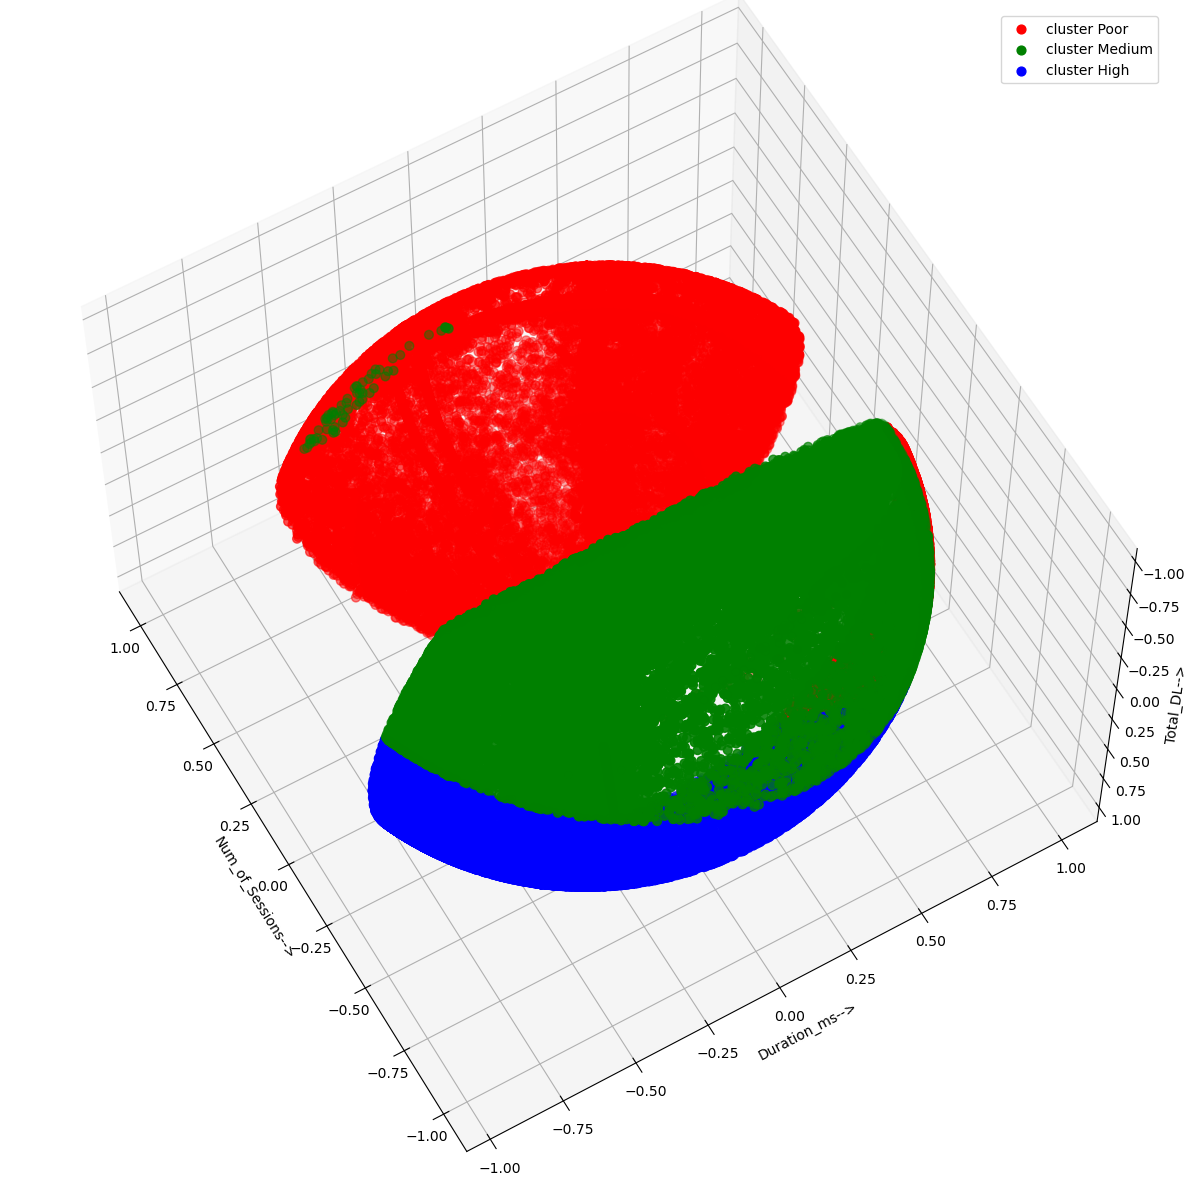

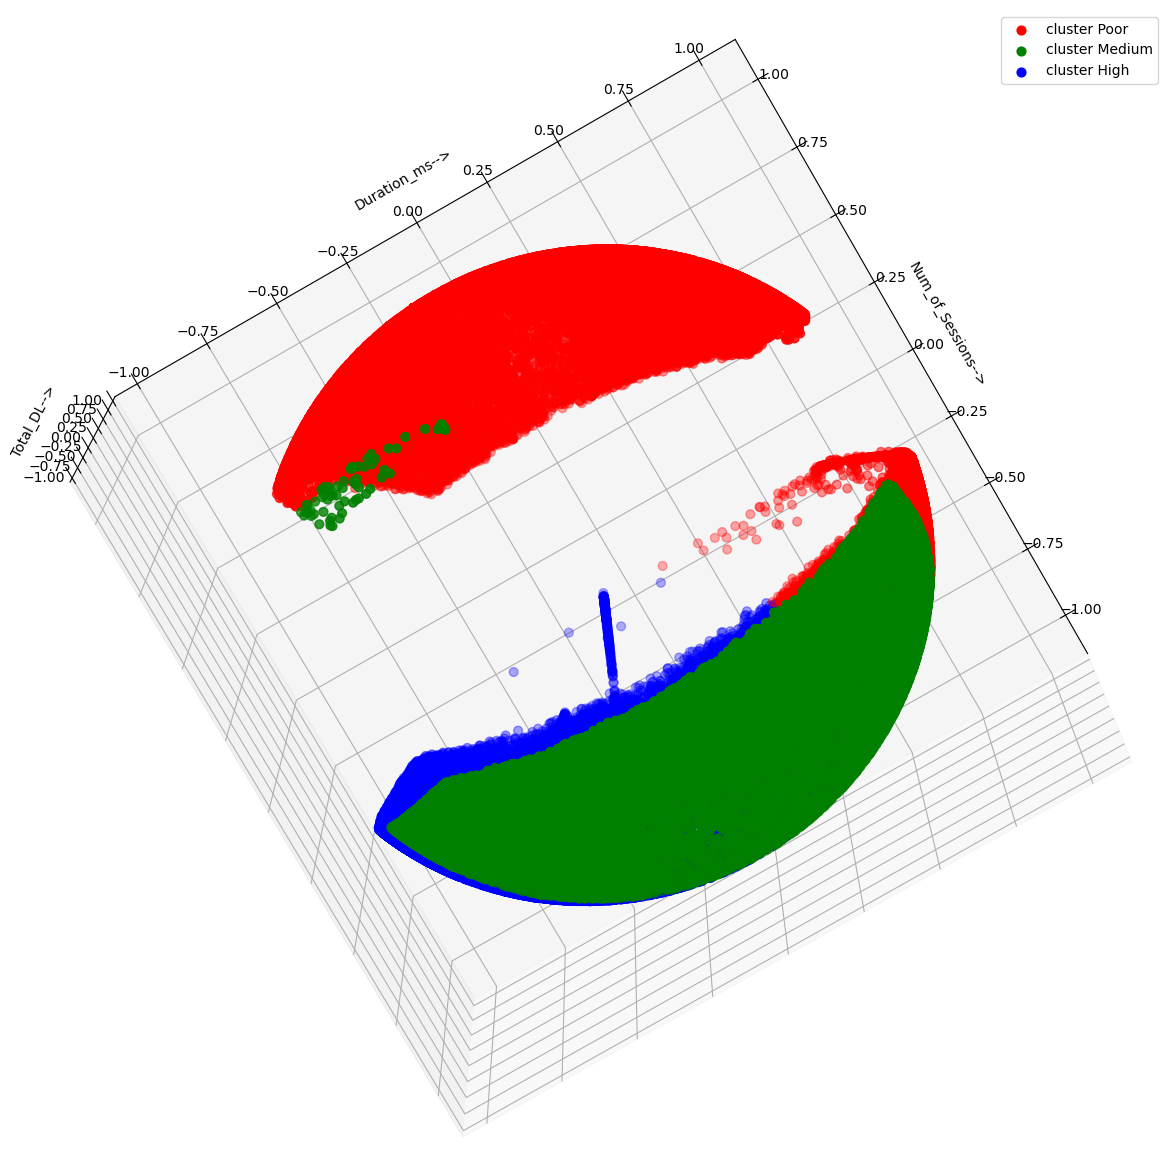

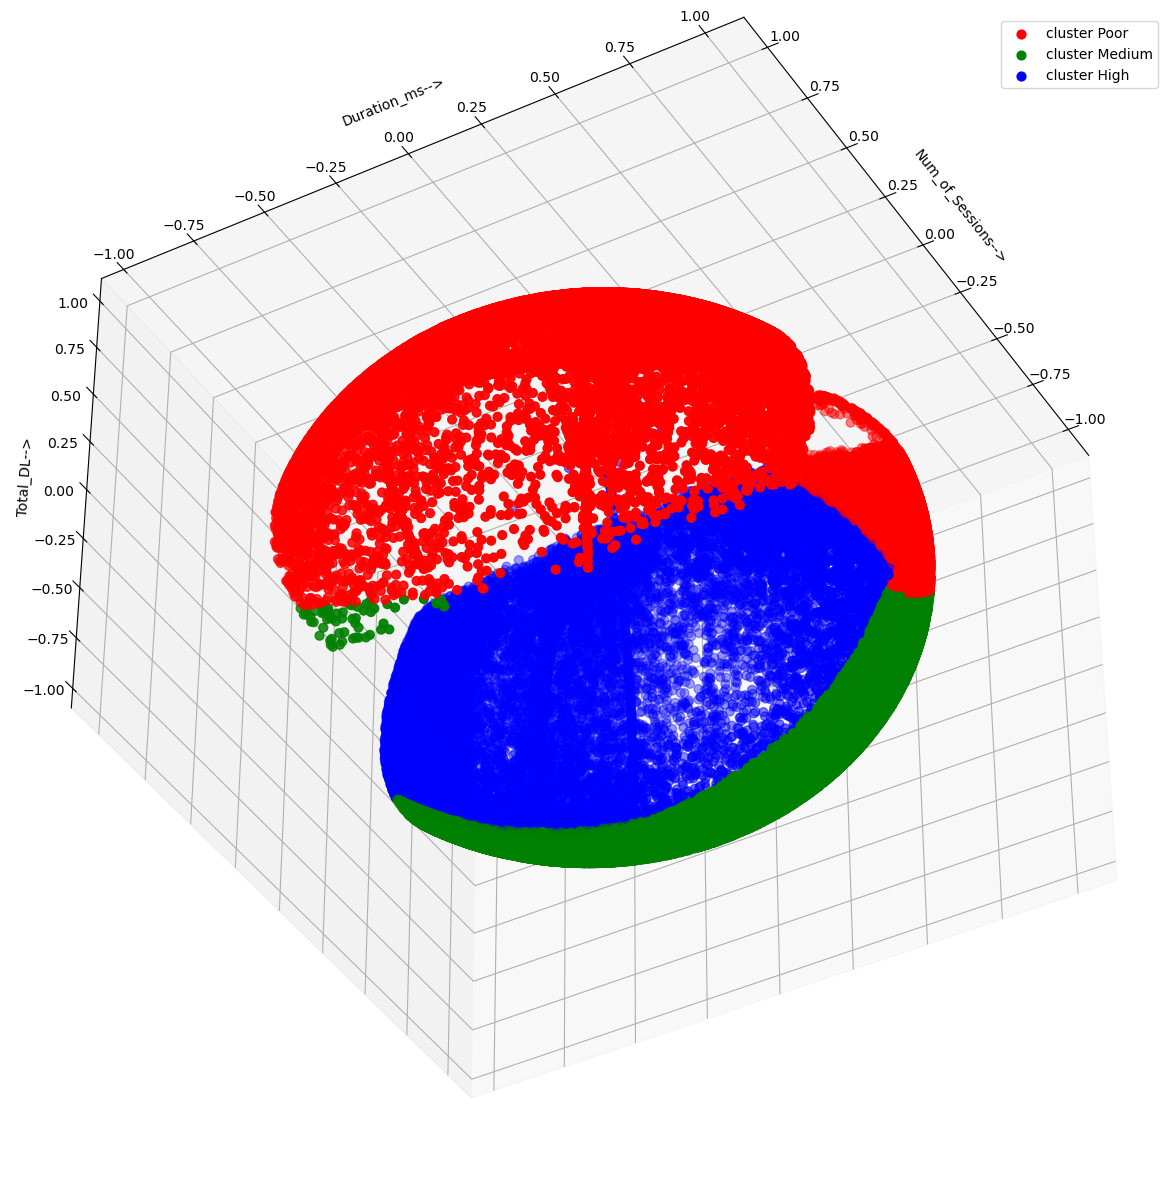

In [11]:
# generating clusters and adding a cluster column
normalized_data = modeler.normalize(unnormalized_data)
unnormalized_data['cluster'] = modeler.cluster(normalized_data, 3, selected_features, ['Poor','Medium','High'], -120,30)
unnormalized_data['cluster'] = modeler.cluster(normalized_data, 3, selected_features, ['Poor','Medium','High'], -80,30)
unnormalized_data['cluster'] = modeler.cluster(normalized_data, 3, selected_features, ['Poor','Medium','High'], -40,30)

In [15]:
unnormalized_data.groupby('cluster').agg({'Total': ['mean', 'min', 'max']})

Total                         
               mean         min          max
cluster                                     
0        862.061225  114.220180  1541.191690
1        295.010159   31.708726   626.922947
2        683.881351  399.272101  1519.217864

In [26]:
df_per_app_aggrigate = pd.DataFrame(index=df_user_aggrigate_outliers_fixed.index)

In [27]:
df_per_app_aggrigate['Netflix'] = df_user_aggrigate_outliers_fixed['Netflix_DL'] + df_user_aggrigate_outliers_fixed['Netflix_UL']
df_per_app_aggrigate['Google'] = df_user_aggrigate_outliers_fixed['Google_DL'] + df_user_aggrigate_outliers_fixed['Google_UL']
df_per_app_aggrigate['YouTube'] = df_user_aggrigate_outliers_fixed['YouTube_DL'] + df_user_aggrigate_outliers_fixed['YouTube_UL']
df_per_app_aggrigate['Social media'] = df_user_aggrigate_outliers_fixed['Social_Media_DL'] + df_user_aggrigate_outliers_fixed['Social_Media_UL']
df_per_app_aggrigate['Gaming'] = df_user_aggrigate_outliers_fixed['Gaming_DL'] + df_user_aggrigate_outliers_fixed['Gaming_UL']
df_per_app_aggrigate['Email'] = df_user_aggrigate_outliers_fixed['Email_DL'] + df_user_aggrigate_outliers_fixed['Email_UL']
for app in ["Gaming","Social media", "YouTube", "Google", "Netflix", "Email"]:
    print("\n\nTop 10 Users using {}\n".format(app), df_per_app_aggrigate.sort_values(by=app, ascending=False).loc[:,app].head(10))



Top 10 Users using Gaming
 MSISDN/Number
3.363733e+10    1370.796708
3.376224e+10    1368.797776
3.364203e+10    1368.194336
3.366088e+10    1367.994132
3.366577e+10    1367.215121
3.362052e+10    1367.086067
3.366770e+10    1366.777599
3.366048e+10    1365.967129
3.361742e+10    1365.666539
3.365924e+10    1365.025572
Name: Gaming, dtype: float64


Top 10 Users using Social media
 MSISDN/Number
3.378315e+10    5.822520
3.366780e+10    5.820882
3.366351e+10    5.813404
3.366414e+10    5.812722
3.363211e+10    5.810915
3.368635e+10    5.804711
3.366266e+10    5.804323
3.360149e+10    5.804031
3.365039e+10    5.800552
3.367650e+10    5.800436
Name: Social media, dtype: float64


Top 10 Users using YouTube
 MSISDN/Number
3.365852e+10    72.090835
3.366262e+10    71.803263
3.369988e+10    71.731916
3.365087e+10    71.560972
3.366451e+10    71.558167
3.366911e+10    71.521601
3.364407e+10    71.468722
3.376156e+10    71.369416
3.366465e+10    71.227476
3.362904e+10    71.182738
Name: YouT

In [36]:
#top most used applications
print("\n\nTop 3 Application by total data volume are\n", df_per_app_aggrigate.sum().sort_values(ascending=False).index[:3].to_list())



Top 3 Application by total data volume are
 ['Gaming', 'YouTube', 'Netflix']


<Axes: >

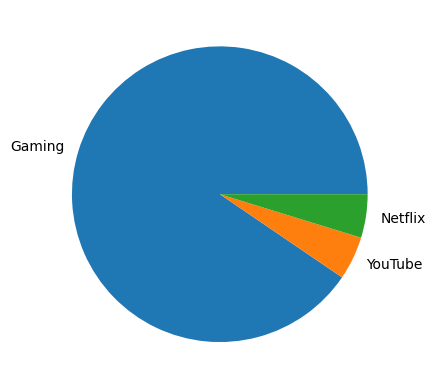

In [39]:
df_per_app_aggrigate.sum().sort_values(ascending=False).head(3)
df_per_app_aggrigate.sum().sort_values(ascending=False).head(3).plot.pie()

In [ ]:
modeler.optimum_k()

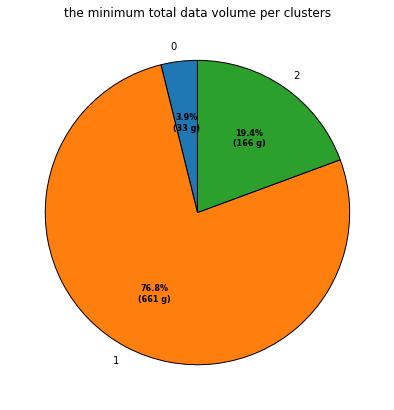

In [11]:
sumar.plot_pie(clus_min_df, ["Clusters_eng", "total_vol_min"], "the minimum total data volume per clusters")

**Observations**
<ul>
    <li> the min value for xDr sessions is similar: 1</li>
    <li> cluster 2 has the largest min value for session duration and total volume used </li> 
</ul>

In [12]:
# maximum values for each of the selected features per cluster

clus_max_df

,Clusters_eng,xDr_max,dur_max,total_vol_max
0,0,2,244.900,1541.899695
1,1,18,1905.478,8846.226494
2,2,4,514.316,2509.056852


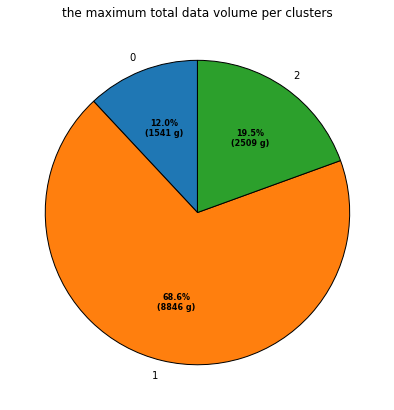

In [13]:
sumar.plot_pie(clus_max_df, ["Clusters_eng", "total_vol_max"], "the maximum total data volume per clusters")

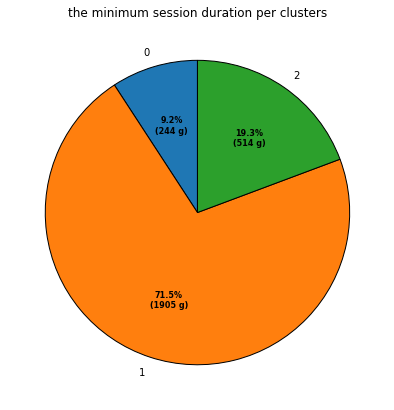

In [14]:
sumar.plot_pie(clus_max_df, ["Clusters_eng", "dur_max"], "the minimum session duration per clusters")

**Observations**
<ul>
    <li> cluster 0 has larger max value for xDr session than cluster 1</li>
    <li> cluster 2 has the largest max (88.1%) value for xDr frequency, session duration and total volume used </li> 
</ul>

In [15]:
# Users count in each cluster.

clus_count_df

,Clusters_eng,Users_count
0,0,79918
1,1,4450
2,2,22488


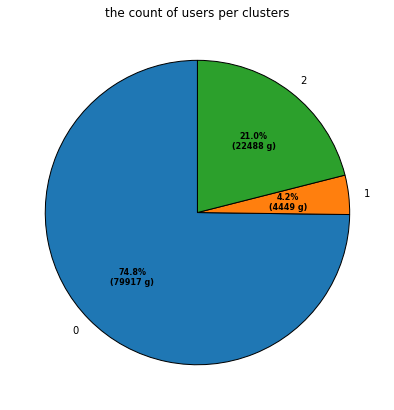

In [16]:
sumar.plot_pie(clus_count_df, ["Clusters_eng", "Users_count"], "the count of users per clusters")

**Observation**

<li>cluster 1 has the largest number of users (74.7%)
<li>cluster 2 has the smallest number of users (3.3%)

In [17]:
# mean values for each of the selected features per cluster

clus_mean_df

,Clusters_eng,xDr_mean,dur_mean,total_vol_mean
0,0,1.023975,93.217984,497.762540
1,1,4.172584,436.815640,2157.544279
2,2,2.139096,192.960680,1087.159891


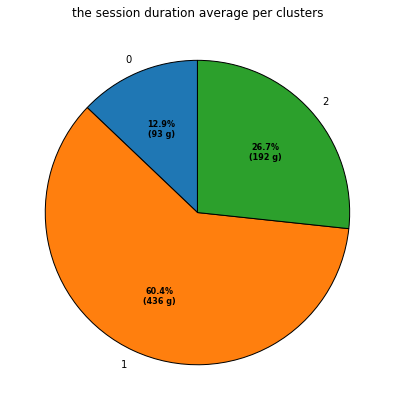

In [18]:
sumar.plot_pie(clus_mean_df, ["Clusters_eng", "dur_mean"], "the session duration average per clusters")

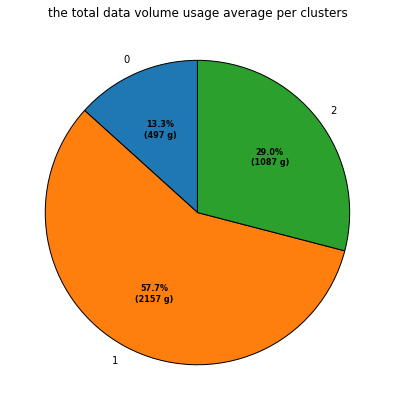

In [19]:
sumar.plot_pie(clus_mean_df, ["Clusters_eng", "total_vol_mean"], "the total data volume usage average per clusters")

**Observation**
<li> again the mean data usage and duration of session is largest for cluster 2
<li> cluster 1 is the least engaged cluster in terms of session duration and total data volume


In [20]:
#lets get the center of the least engaged cluster

least_center = kmeans1.cluster_centers_[1]
least_center

array([3.4342138 , 3.03783822, 2.9864658 ])

In [21]:
# Calculating engagement score based on euclidean distance between 
# the least_center and the user data points within the selected features

normalised_df = sumar.calcScore(normalised_df, least_center, selected_features, "eng_score")  
normalised_df.head()

,xDr_session_count,session_dur,total_vol,eng_score
0,-0.481290,-0.116344,0.382392,22.275285
1,-0.481290,0.519809,-1.087633,24.417806
2,-0.481290,0.063615,-0.193382,23.065979
3,-0.481290,-0.775493,-0.547016,25.734567
4,0.753493,-0.901461,1.560970,19.459387


In [22]:
# adding the engagement score to the non-normalized dataframe.

data_with_clusters["eng_score"] = normalised_df["eng_score"]
sumar.summ_columns(data_with_clusters)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,float64,106856
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,74492
3,Handset,0,0.0,object,1394
4,Total_DL,0,0.0,float64,106851
5,Total_UL,0,0.0,float64,106715
6,total_vol,0,0.0,float64,106853
7,RTT total,0,0.0,float64,787
8,TP total,0,0.0,float64,28856
9,TCP total,0,0.0,float64,29986


In [23]:
# checking the min and max of the eng_score

data_with_clusters["eng_score"].min(), data_with_clusters["eng_score"].max()

(0.0, 100.0)

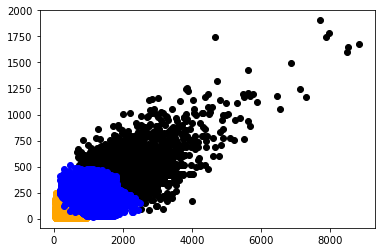

In [24]:
# 2-D plotting of the distribution between total_vol and session_dur
# filter rows of original data by clusters to plot them individually

filtered_label0 = data_with_clusters.loc[data_with_clusters["Clusters_eng"] == 0] 
filtered_label1 = data_with_clusters.loc[data_with_clusters["Clusters_eng"] == 1]
filtered_label2 = data_with_clusters.loc[data_with_clusters["Clusters_eng"] == 2]
 
#Plotting the results
plt.scatter(filtered_label0.loc[:,"total_vol"] , filtered_label0.loc[:,"session_dur"] , color = 'orange')
plt.scatter(filtered_label1.loc[:,"total_vol"] , filtered_label1.loc[:,"session_dur"] , color = 'black')
plt.scatter(filtered_label2.loc[:,"total_vol"] , filtered_label2.loc[:,"session_dur"] , color = 'blue')

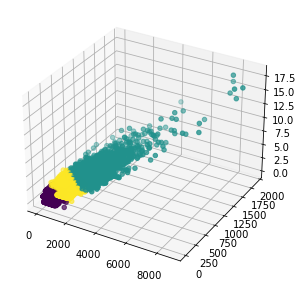

In [25]:
# 3-D plotting

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_clusters['total_vol'],data_with_clusters['session_dur'],data_with_clusters['xDr_session_count'], c =data_with_clusters['Clusters_eng'])

**Observation**
<li> the three clusters are linearly separated as shown in the plot above.

In [26]:
# Top 10 most engaged users per application

sumar.show_N_per_col(data_with_clusters, "MSISDN/Number", ["youtube", "netflix", "gaming", "email", "google", "social"], 10)


Top 10 customers based on youtube

       MSISDN/Number     youtube
13180   3.362578e+10  452.958769
92923   3.376054e+10  396.289198
6437    3.361489e+10  394.370218
13526   3.362632e+10  374.483047
76363   3.367588e+10  317.410572
65118   3.366716e+10  315.231310
13994   3.362708e+10  308.790774
92577   3.376041e+10  303.169107
86455   3.369879e+10  302.661958
666     3.360313e+10  284.090139

Top 10 customers based on netflix

        MSISDN/Number     netflix
37052    3.365973e+10  399.519079
6437     3.361489e+10  361.401046
13180    3.362578e+10  356.980607
92923    3.376054e+10  334.643269
13526    3.362632e+10  328.725740
92577    3.376041e+10  318.347546
65118    3.366716e+10  313.939488
76363    3.367588e+10  309.093159
106137   3.378632e+10  305.939790
94654    3.376127e+10  292.091341

Top 10 customers based on gaming

       MSISDN/Number       gaming
6437    3.361489e+10  7749.432234
92923   3.376054e+10  7461.045228
13180   3.362578e+10  7326.673487
76363   3.367588e+10

<AxesSubplot:>

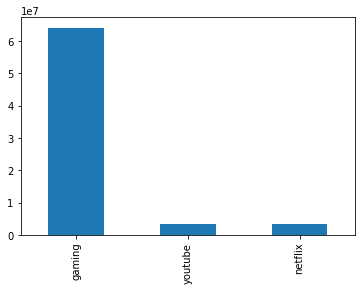

In [27]:
# Top 3 most used applications

data_with_clusters[['youtube','gaming','email','netflix','social']].sum().sort_values(ascending = False).head(3).plot(kind='bar')

In [28]:
# calculating the most appropriate k value

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalised_df)
    Sum_of_squared_distances.append(km.inertia_)

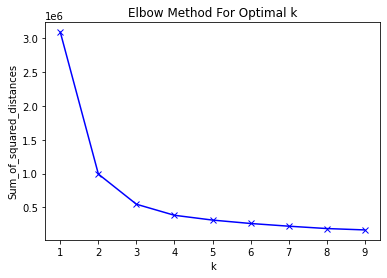

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

3 is indeed the optimum k value.

In [30]:
# Saving new dataframe with engagement score.

save_data_path = os.path.join(parent_dir,"data","teleco_user_engagement_data.csv") # setting path to data directory
data_with_clusters.to_csv(save_data_path, index=False)